In [277]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import pickle
import librosa

dataset = pickle.load(open("data/train.pkl", 'rb'))

In [272]:
def create_mel(wave):
    mel = librosa.feature.melspectrogram(
        y = wave,
        n_fft = 1024,
        hop_length = 512,
        n_mels = 80
    )
    time_intervals = mel.shape[1]
    mel = mel[:, :min(time_intervals, 80)]
    mel = librosa.power_to_db(mel)
    padding_right = max(0, 80 - time_intervals)
    mel = np.pad(
        mel, 
        [[0, 0], [0, padding_right]], 
        mode = 'edge'
    )
    return mel

def draw_mel(mel):
    plt.matshow(mel)
    plt.show()

def draw_wave(wave):
    plt.plot([i for i in range(len(wave))], wave)
    plt.show()

<class 'str'>
<class 'torch.Tensor'> torch.Size([1, 80, 80])
<class 'int'>
<class 'numpy.ndarray'> (20505,)
blues.00000.wav 0


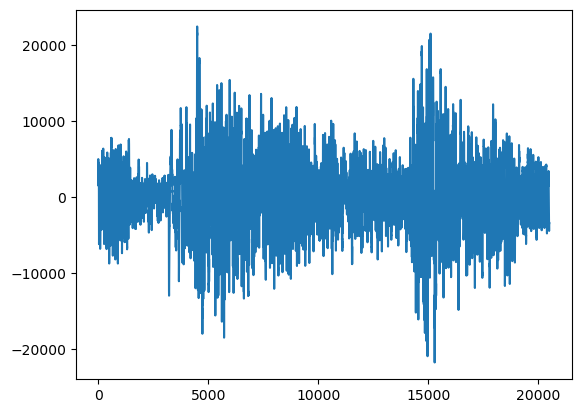

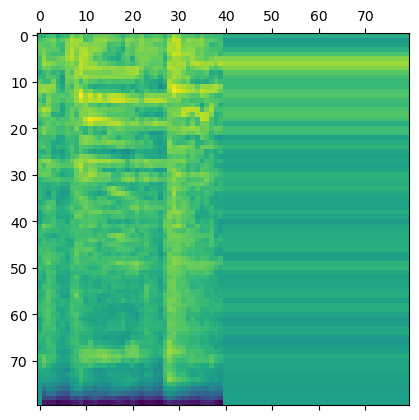

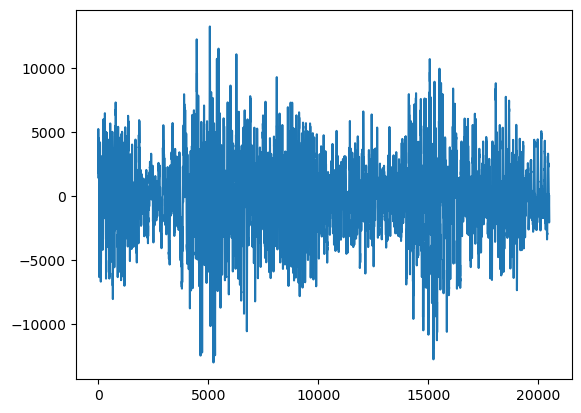

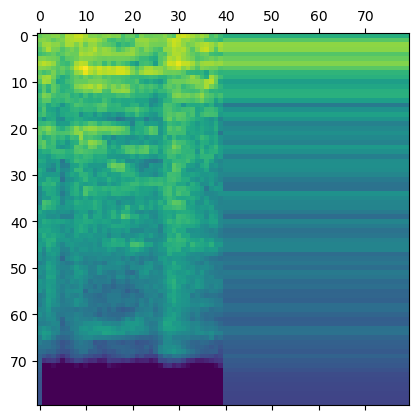

In [300]:
sample = dataset[0]

print(type(sample[0]))
print(type(sample[1]), sample[1].shape)
print(type(sample[2]))
print(type(sample[3]), sample[3].shape)

file = sample[0]
mel = sample[1][0]
label = sample[2]
wave = sample[3]

print(file, label)

draw_wave(wave)
draw_mel(mel)

# wave_2 = librosa.effects.time_stretch(wave, rate = 0.5)
wave_2 = librosa.effects.pitch_shift(wave, sr = 22050, n_steps = -5, bins_per_octave = 12)
mel_2 = create_mel(wave_2)
draw_wave(wave_2)
draw_mel(mel_2)